# IDS706 Cloud-Hosted Notebook Data Manipulation

## Setup and Configuration

### Google Colab Setup

In [47]:
import sys
!{sys.executable} -m pip install --quiet pandas matplotlib seaborn

### Dataset Import

In [44]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)

First five rows

In [48]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Last five rows

In [35]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


Column names

In [37]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Dataset size

In [38]:
data.shape

(150, 5)

## Data Manipulation

### Analyse Data

In [16]:
# Check for missing values and basic statistics
print("Missing values:\n", data.isnull().sum())
print("\nBasic statistics:\n", data.describe())

# Display how many 'species' in the dataset
print("\nUnique species:", data['species'].unique())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Basic statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Unique species: ['setosa' 'versicolor' 'virginica']


### Process Data

In [25]:
# Create a feature for petal area (petal length * petal width)
data['petal_area'] = data['petal_length'] * data['petal_width']

# Map species to numerical values
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
data['species_code'] = data['species'].map(species_mapping)

### Visualize Data

#### Display Pairwise Relationships
Pairwise relationships between `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`.

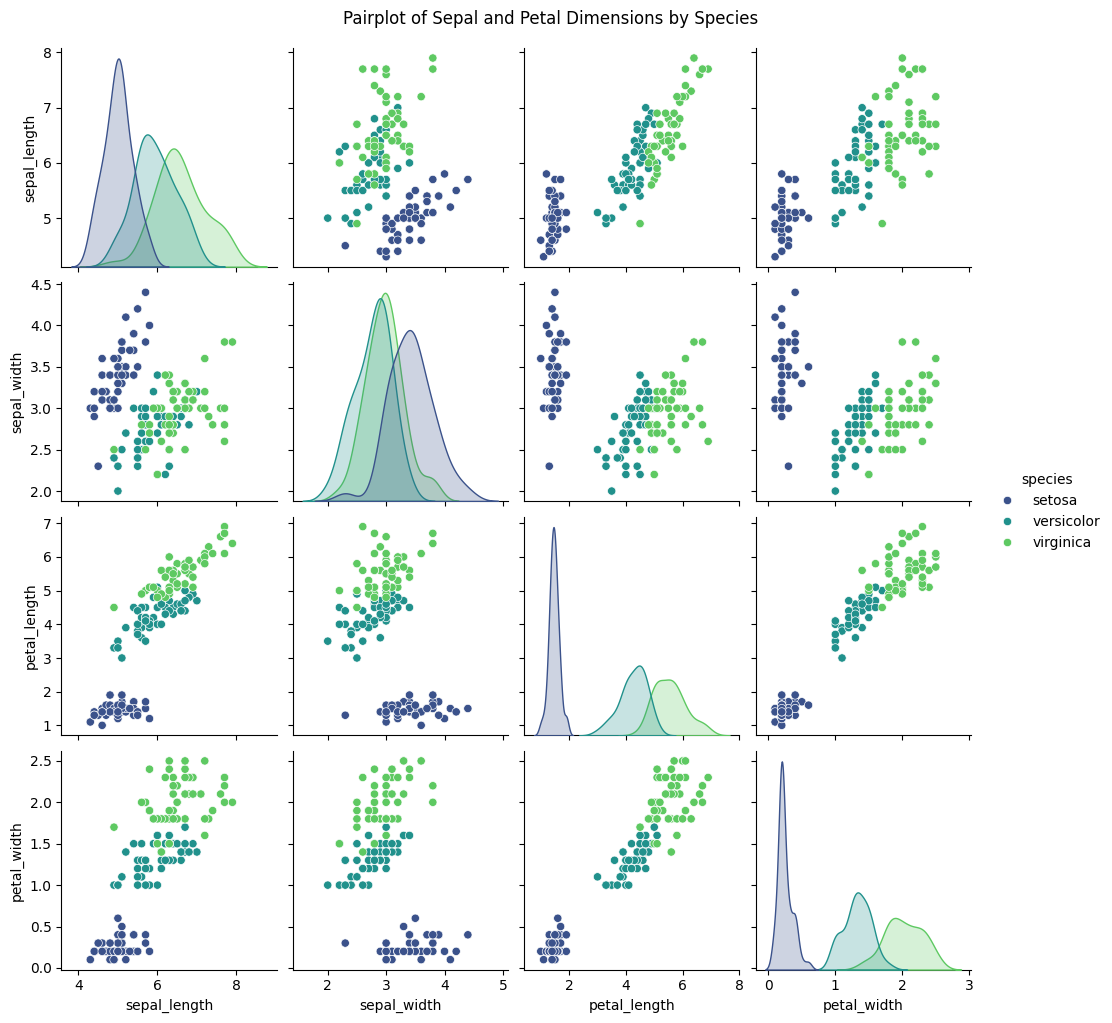

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], hue='species', palette='viridis')
plt.suptitle('Pairplot of Sepal and Petal Dimensions by Species', y=1.02)
plt.show()

Bar plot for average petal area by species

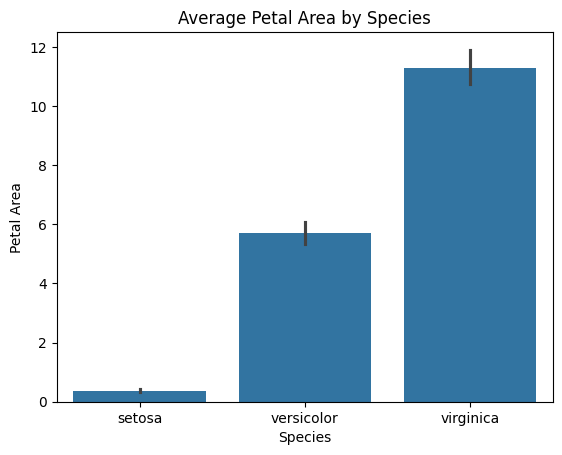

In [27]:
sns.barplot(x='species', y='petal_area', data=data)
plt.title('Average Petal Area by Species')
plt.xlabel('Species')
plt.ylabel('Petal Area')
plt.show()

Distribution of Sepal and Petal Length by Species

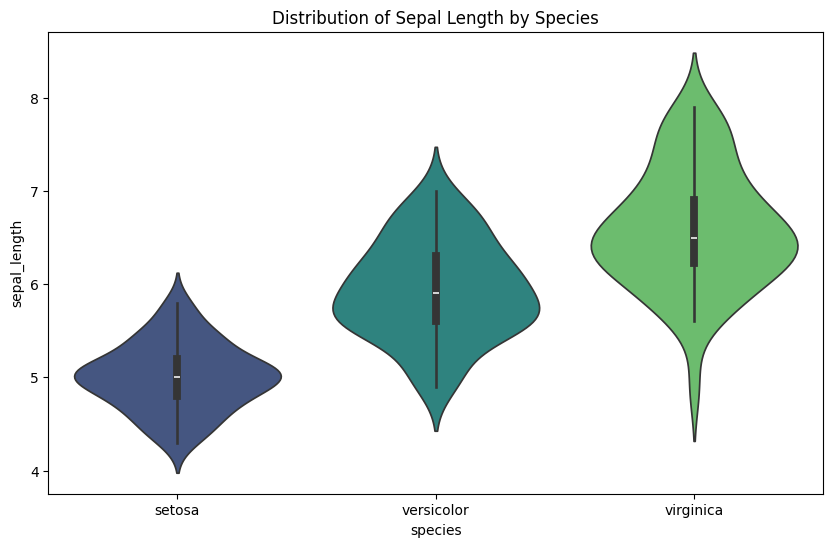

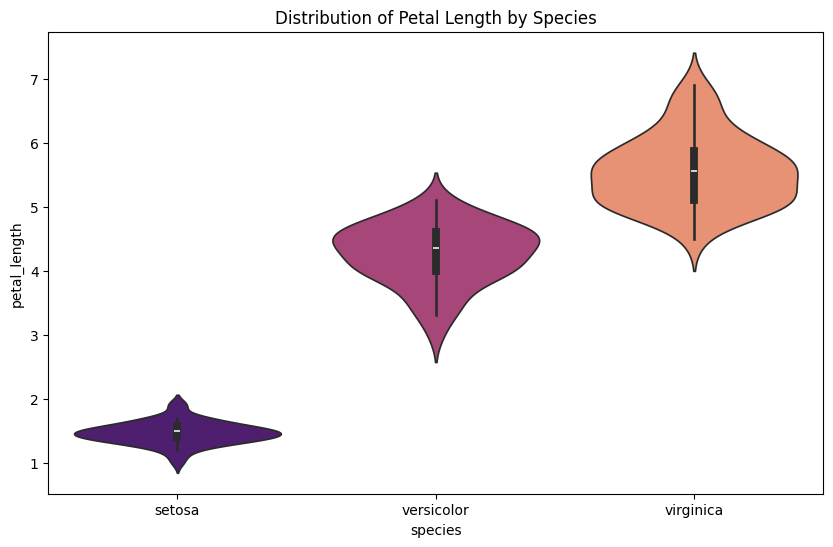

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='sepal_length', hue='species', data=data, palette='viridis', legend=False)
plt.title('Distribution of Sepal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal_length', hue='species', data=data, palette='magma', legend=False)
plt.title('Distribution of Petal Length by Species')
plt.show()
